<a href="https://colab.research.google.com/github/it21813702/ML_Assignment_1/blob/main/Final_ML_Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Loading and Initial Exploration

Dataset shape: (255347, 18)

First 10 rows of the dataset:


,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0
5,A9S62RQ7US,25,90298,90448,720,18,2,22.72,24,0.10,High School,Unemployed,Single,Yes,No,Business,Yes,1
6,H8GXPAOS71,38,111188,177025,429,80,1,19.11,12,0.16,Bachelor's,Unemployed,Single,Yes,No,Home,Yes,0
7,0HGZQKJ36W,56,126802,155511,531,67,4,8.15,60,0.43,PhD,Full-time,Married,No,No,Home,Yes,0
8,1R0N3LGNRJ,36,42053,92357,827,83,1,23.94,48,0.20,Bachelor's,Self-employed,Divorced,Yes,No,Education,No,1
9,CM9L1GTT2P,40,132784,228510,480,114,4,9.09,48,0.33,High School,Self-employed,Married,Yes,No,Other,Yes,0



Missing Values per Column:
LoanID            0
Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64

Summary Statistics:
                 Age         Income     LoanAmount    CreditScore  \
count  255347.000000  255347.000000  255347.000000  255347.000000   
mean       43.498306   82499.304597  127578.865512     574.264346   
std        14.990258   38963.013729   70840.706142     158.903867   
min        18.000000   15000.000000    5000.000000     300.000000   
25%        31.000000   48825.500000   66156.000000     437.000000   
50%        43.000000   82466.000000  127556.000000     574.000000   
75%        56.000000  116219.000000  188985.000000     712.000000   
max        69.000000  1499

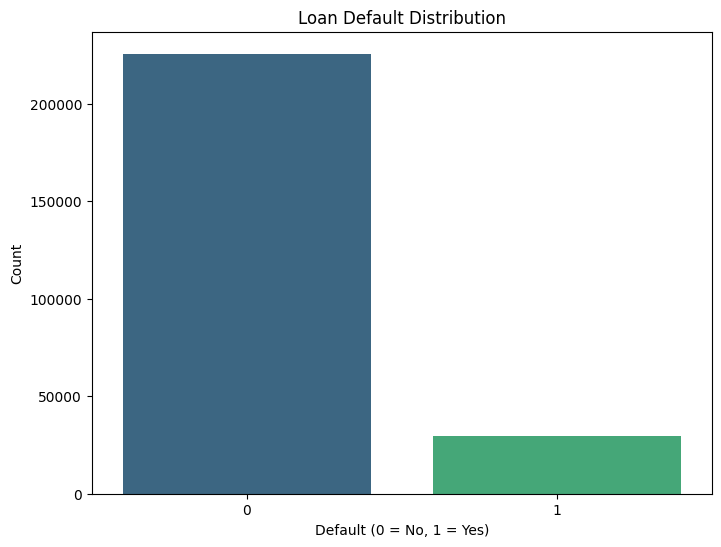

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


# load the dataset here
df = pd.read_csv('Loan_default.csv')


# print basic information about the dataset, the "shape"
print("Dataset shape:", df.shape)
print("\nFirst 10 rows of the dataset:")

display(df.head(10))


# check for missing values
# knowing missing values is important for handling data quality issues.
print("\nMissing Values per Column:")
print(df.isnull().sum())


# summry stats for numerical features
# helps in understanding the distributions, range, and central tendency.
print("\nSummary Statistics:")
print(df.describe())


# check target variable (default) distribution
# important for detecting class imbalances in the dataset.
print("\nTarget Variable Distribution (Counts):")
print(df['Default'].value_counts())
print("\nTarget Variable Proportions (%):")

print((df['Default'].value_counts(normalize=True) * 100).round(2))


# visulz the distrbut of the target variable using a count plot.
plt.figure(figsize=(8, 6))
sns.countplot(x='Default', data=df, palette='viridis')
plt.title('Loan Default Distribution')
plt.xlabel('Default (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

# Data Preprocessign and Cleaning

Examining Categorical Variables:

Education value counts:
Education
Bachelor's     64366
High School    63903
Master's       63541
PhD            63537
Name: count, dtype: int64
Number of unique values: 4

EmploymentType value counts:
EmploymentType
Part-time        64161
Unemployed       63824
Self-employed    63706
Full-time        63656
Name: count, dtype: int64
Number of unique values: 4

MaritalStatus value counts:
MaritalStatus
Married     85302
Divorced    85033
Single      85012
Name: count, dtype: int64
Number of unique values: 3

HasMortgage value counts:
HasMortgage
Yes    127677
No     127670
Name: count, dtype: int64
Number of unique values: 2

HasDependents value counts:
HasDependents
Yes    127742
No     127605
Name: count, dtype: int64
Number of unique values: 2

LoanPurpose value counts:
LoanPurpose
Business     51298
Home         51286
Education    51005
Other        50914
Auto         50844
Name: count, dtype: int64
Number of unique values: 5

HasCoSigner value count

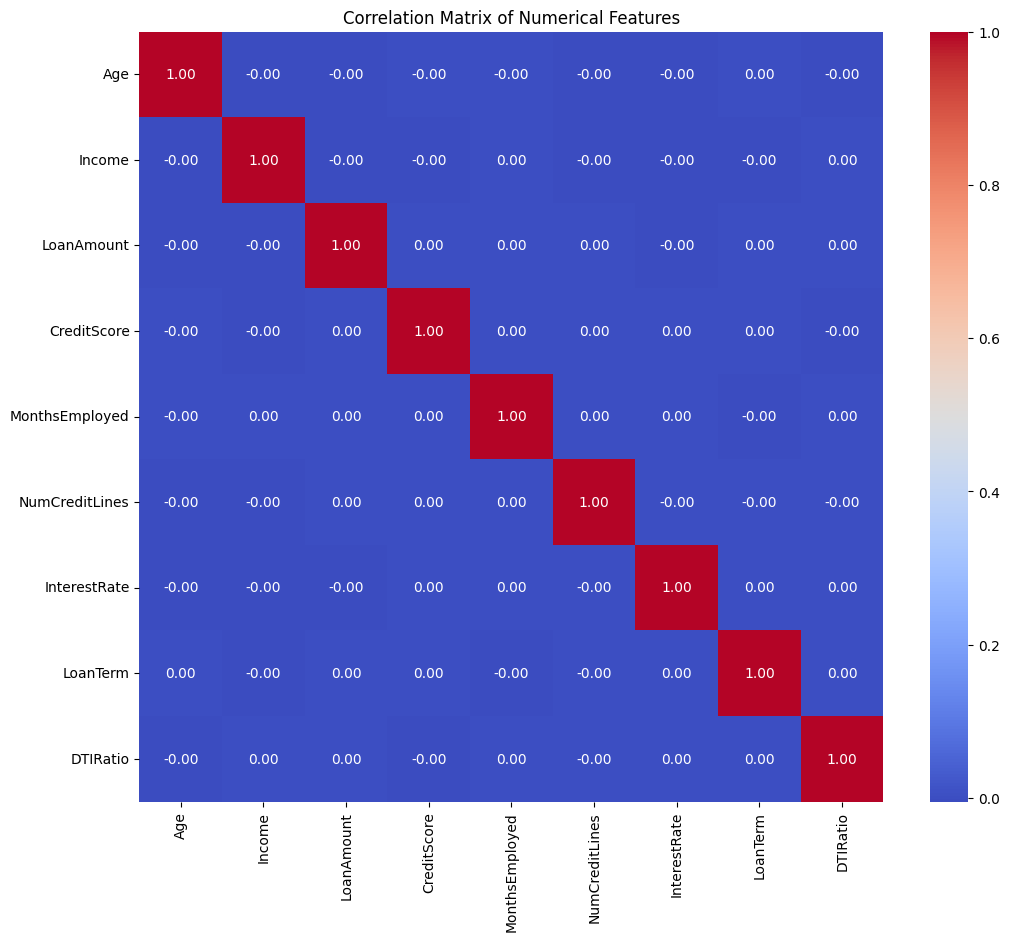

Outlier Detection and Treatment:
  Age: No outliers detected using IQR.
  Income: No outliers detected using IQR.
  LoanAmount: No outliers detected using IQR.
  CreditScore: No outliers detected using IQR.
  MonthsEmployed: No outliers detected using IQR.
  NumCreditLines: No outliers detected using IQR.
  InterestRate: No outliers detected using IQR.
  LoanTerm: No outliers detected using IQR.
  DTIRatio: No outliers detected using IQR.

HasMortgage value counts after mapping:
HasMortgage
1    127677
0    127670
Name: count, dtype: int64

HasDependents value counts after mapping:
HasDependents
1    127742
0    127605
Name: count, dtype: int64

HasCoSigner value counts after mapping:
HasCoSigner
1    127701
0    127646
Name: count, dtype: int64

After mapping multi-category columns:
Education unique codes: [0 2 1 3]
EmploymentType unique codes: [0 3 2 1]
MaritalStatus unique codes: [0 1 2]
LoanPurpose unique codes: [4 0 1 3 2]

Data types after preprocessing:
LoanID             object

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
147871,U2CH4U2PPU,26,29746,50929,453,101,3,3.03,48,0.30,2,2,2,1,1,1,0,0
198120,2Q39IUZIPF,31,31095,176023,481,61,3,4.20,60,0.24,3,1,1,0,1,3,0,0
221730,2MI4MZOKJY,53,39674,67591,815,33,1,18.09,12,0.85,2,0,0,0,1,3,1,0
122379,QB3FJT5MZH,19,121462,26223,352,24,3,2.71,60,0.63,1,3,0,0,0,0,0,1
138345,KDQUCLWRU7,29,112361,154819,515,97,1,2.75,12,0.25,3,1,2,1,1,0,0,0


In [ ]:
# specify the numerical and categorical columns based on the dataset.
numerical_features = ['Age', 'Income', 'LoanAmount', 'CreditScore',
                      'MonthsEmployed', 'NumCreditLines', 'InterestRate',
                      'LoanTerm', 'DTIRatio']


categorical_features = ['Education', 'EmploymentType', 'MaritalStatus',
                        'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner']


# check cat. Variables
# examine cat variables and their distribtns.
print("Examining Categorical Variables:")
for feature in categorical_features:
    print(f"\n{feature} value counts:")
    print(df[feature].value_counts())
    print("Number of unique values:", df[feature].nunique())


# repeat Rows Check and remvoal
duplicate_count = df.duplicated().sum()
print(f"\nDuplicate rows found: {duplicate_count}")
if duplicate_count > 0:
    df = df.drop_duplicates()
    print(f"Removed {duplicate_count} duplicate rows")



# map  binary categorical variables ('Yes'/'No') to numerical values 1 and 0.
binary_columns = ['HasMortgage', 'HasDependents', 'HasCoSigner']
for col in binary_columns:
    df[col] = df[col].map({'Yes': 1, 'No': 0})
    print(f"\n{col} value counts after mapping:")
    print(df[col].value_counts())


# For multi-category features, convert them to categorical codes.
df['Education'] = df['Education'].astype('category').cat.codes
df['EmploymentType'] = df['EmploymentType'].astype('category').cat.codes
df['MaritalStatus'] = df['MaritalStatus'].astype('category').cat.codes
df['LoanPurpose'] = df['LoanPurpose'].astype('category').cat.codes

print("\nAfter mapping multi-category columns:")
print("Education unique codes:", df['Education'].unique())
print("EmploymentType unique codes:", df['EmploymentType'].unique())
print("MaritalStatus unique codes:", df['MaritalStatus'].unique())
print("LoanPurpose unique codes:", df['LoanPurpose'].unique())



# visualise correlations in numerical features using a heatmap.
plt.figure(figsize=(12,10))
sns.heatmap(df[numerical_features].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()



# Outlier Detection and Capping Functions
def identify_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]

    return outliers.shape[0], lower_bound, upper_bound


def cap_outliers(data, column, lower_bound, upper_bound):
    df_capped = data.copy()
    df_capped[column] = df_capped[column].clip(lower=lower_bound, upper=upper_bound)
    return df_capped



# apply above functions for each numerical feature
print("Outlier Detection and Treatment:")
for col in numerical_features:
    count, lower, upper = identify_outliers_iqr(df, col)
    perc = (count / len(df)) * 100

    if count > 0:
        print(f"  {col}: {count} outliers ({perc:.2f}% of data). Capping to [{lower:.2f}, {upper:.2f}].")
        df = cap_outliers(df, col, lower, upper)
    else:
        print(f"  {col}: No outliers detected using IQR.")



# confirm Data Types and Cleaned Data
print("\nData types after preprocessing:")
print(df.dtypes)

print("\nDataset shape after cleaning:", df.shape)
print("\nSample of the preprocessed data:")
display(df.sample(5))


# Feature Engineering

Created: CreditScoreToLoanRatio
Created: MonthlyPayment
Created: PaymentToIncomeRatio
Created: EmploymentToLoanTermRatio
Created: AgeCreditInteraction
Created: DebtBurden with log-transformed income
Created: AgeGroup

Summary statistics of engineered features:
       CreditScoreToLoanRatio  MonthlyPayment  PaymentToIncomeRatio  \
count           255347.000000   255347.000000         255347.000000   
mean                 0.009184     5649.062363              1.157286   
std                  0.014196     4731.401956              1.466405   
min                  0.001205       90.802843              0.008192   
25%                  0.002989     2317.463583              0.336087   
50%                  0.004502     4442.059863              0.682542   
75%                  0.008685     7259.845864              1.397868   
max                  0.167853    23735.666660             18.086068   

       EmploymentToLoanTermRatio  AgeCreditInteraction     DebtBurden  \
count              255347.

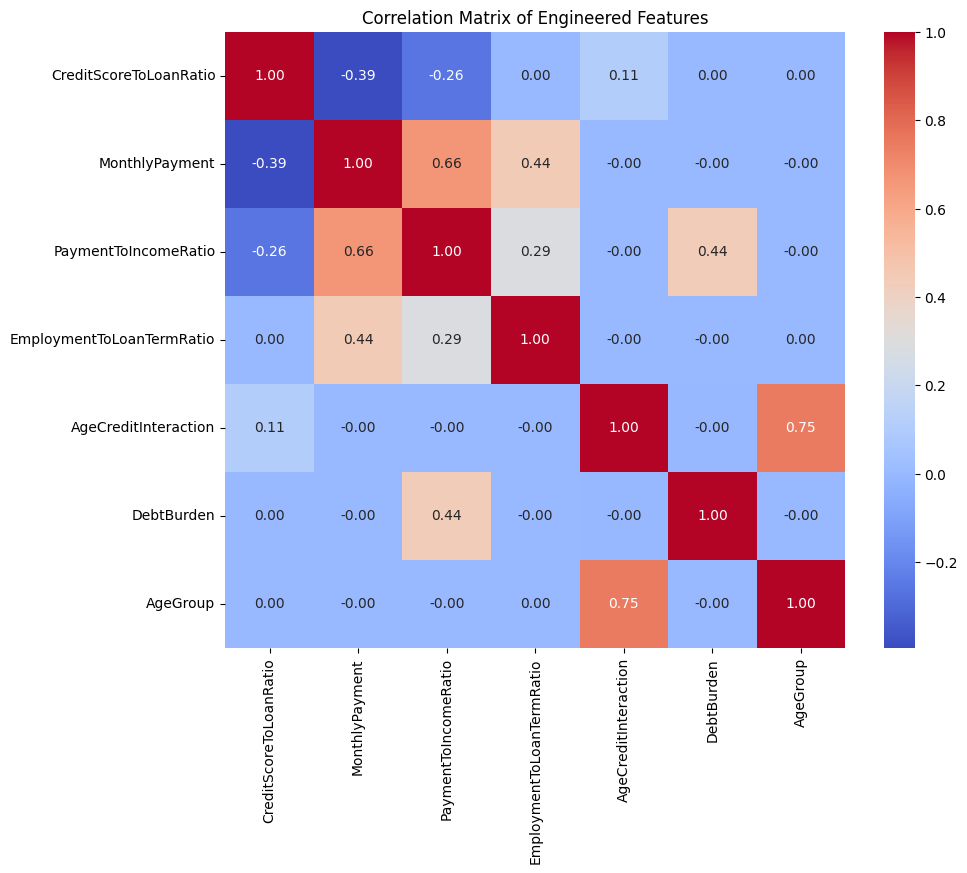


Plotting box plots for engineered features versus the target variable...


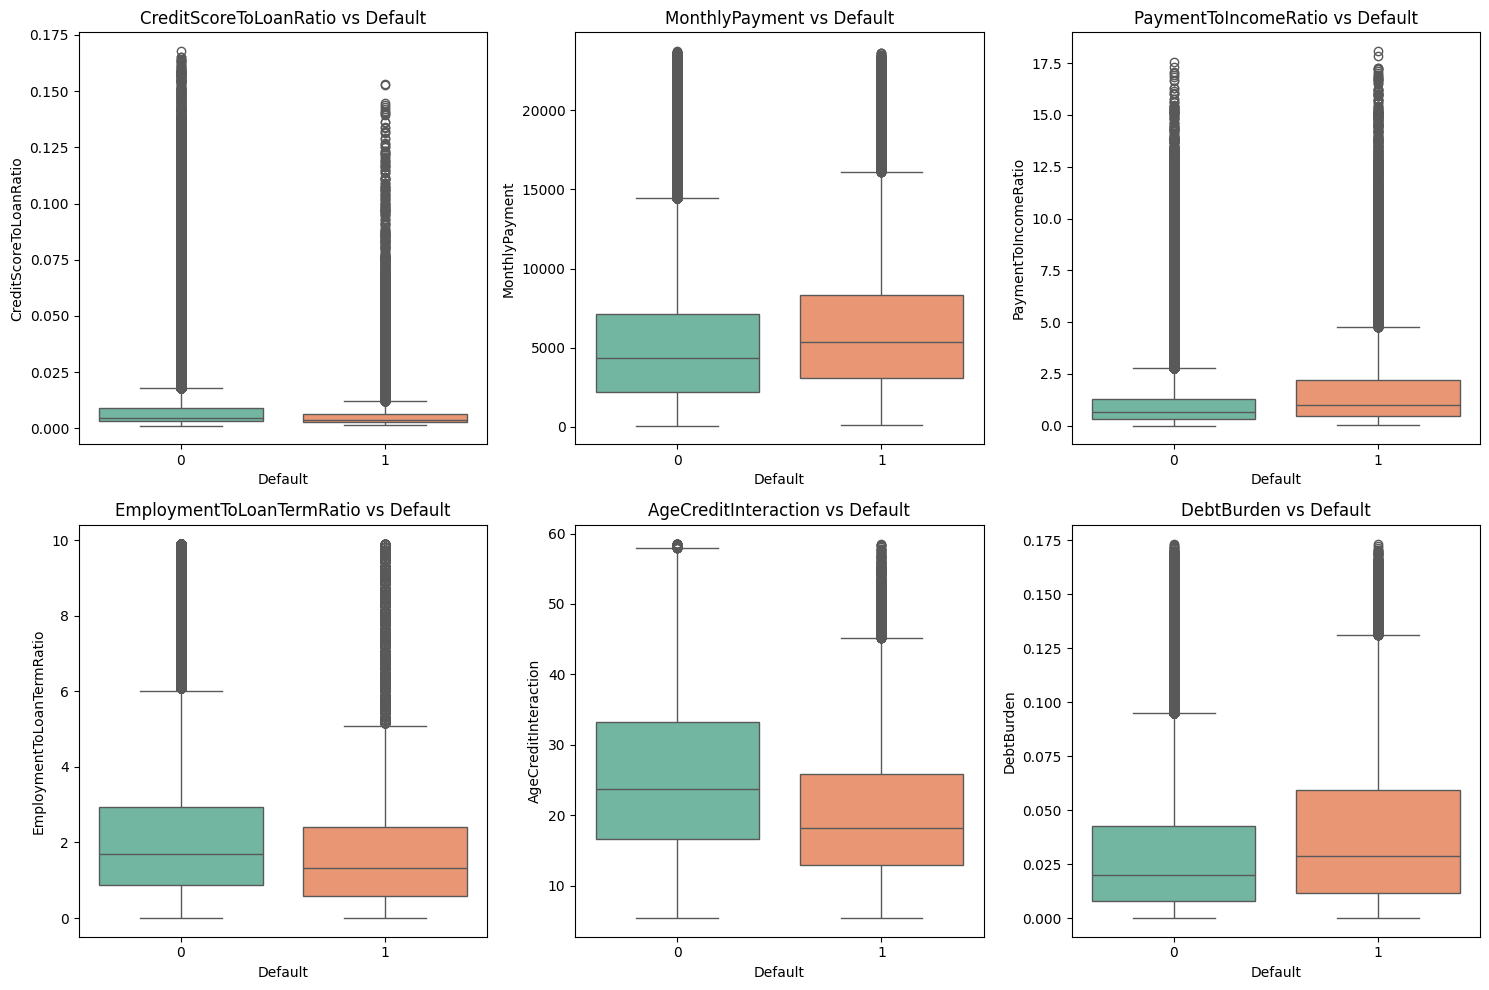

In [ ]:
# f1 CreditScoreToLoanRatio: normalise credit score by the loan amount.
df['CreditScoreToLoanRatio'] = df['CreditScore'] / df['LoanAmount']
print("Created: CreditScoreToLoanRatio")



# f2 Monthly Payment using the fixed-rate loan formula
# PMT = P * (r*(1+r)^n) / ((1+r)^n - 1)
df['MonthlyInterestRate'] = df['InterestRate'] / 100 / 12  # Convert annual interest % to monthly decimal rate
df['MonthlyPayment'] = df['LoanAmount'] * (
    df['MonthlyInterestRate'] * (1 + df['MonthlyInterestRate']) ** df['LoanTerm']
) / ((1 + df['MonthlyInterestRate']) ** df['LoanTerm'] - 1)
print("Created: MonthlyPayment")



# f3 PaymentToIncomeRatio
df['PaymentToIncomeRatio'] = (df['MonthlyPayment'] * 12) / df['Income']
print("Created: PaymentToIncomeRatio")



# f4 EmploymentToLoanTermRatio: Ratio of months employed to loan term.
df['EmploymentToLoanTermRatio'] = df['MonthsEmployed'] / df['LoanTerm']
print("Created: EmploymentToLoanTermRatio")



# f5 AgeCreditInteraction: Interaction between age and credit score
df['AgeCreditInteraction'] = (df['Age'] * df['CreditScore']) / 1000  # Scaling for stability
print("Created: AgeCreditInteraction")



# f6 DebtBurden by combining DTIRatio and log-transformed Income
df['DebtBurden'] = df['DTIRatio'] * (1 - (np.log(df['Income']) / np.log(df['Income'].max())))
print("Created: DebtBurden with log-transformed income")



# f7 Create AgeGroup: Bin age variable into categories for potential non-linear effects.
age_bins = [0, 25, 35, 45, 55, 65, 100]
age_labels = ['<25', '25-35', '35-45', '45-55', '55-65', '65+']
df['AgeGroup'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)


# Convert AgeGroup to numerical codes
df['AgeGroup'] = df['AgeGroup'].astype('category').cat.codes
print("Created: AgeGroup")




# list engineered features
engineered_features = ['CreditScoreToLoanRatio', 'MonthlyPayment', 'PaymentToIncomeRatio',
                         'EmploymentToLoanTermRatio', 'AgeCreditInteraction', 'DebtBurden', 'AgeGroup']


# summary statistics for the engineered features.
print("\nSummary statistics of engineered features:")
print(df[engineered_features].describe())



# visualize Engineered Feature Correlations with a Heatmap
print("\nPlotting heatmap of engineered feature correlations...")
plt.figure(figsize=(10, 8))
sns.heatmap(df[engineered_features].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Engineered Features')
plt.show()



#  use heatmap to show how each engineered feature varies by the target variable.
features_for_boxplots = engineered_features.copy()
if 'AgeGroup' in features_for_boxplots:
    features_for_boxplots.remove('AgeGroup')



#  box plots to see how engineered features vary by the target variable.
print("\nPlotting box plots for engineered features versus the target variable...")
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features_for_boxplots):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(x='Default', y=feature, data=df, palette='Set2')
    plt.title(f'{feature} vs Default')
    plt.xlabel("Default")
    plt.ylabel(feature)

plt.tight_layout()
plt.show()



In [ ]:
# its important to drop features that are highly correlated with others
# to simplify the model and avoid overfitting.


# drop features with corel. above this threhold
HIGH_CORR_THRESHOLD = 0.75

to_drop = []  # collect any features to drop here



# use heatmap and double check features with high m.collinerarity
# check correlation between AgeGroup and AgeCreditInteraction
if 'AgeGroup' in df.columns and 'AgeCreditInteraction' in df.columns:

    corr_ag_ac = df[['AgeGroup', 'AgeCreditInteraction']].corr().iloc[0, 1]
    print("\nCorrelation between AgeGroup and AgeCreditInteraction:", round(corr_ag_ac, 2))

    if abs(corr_ag_ac) > HIGH_CORR_THRESHOLD:
        print(f"Dropping 'AgeCreditInteraction' due to correlation > {HIGH_CORR_THRESHOLD} with 'AgeGroup'.")
        to_drop.append('AgeCreditInteraction')
    else:
        print("'AgeCreditInteraction' retained (correlation below threshold).")



#  Age and AgeCreditInteraction as additional verification
if 'Age' in df.columns and 'AgeCreditInteraction' in df.columns:
    corr_age_ac = df[['Age', 'AgeCreditInteraction']].corr().iloc[0, 1]

    print("Correlation between Age and AgeCreditInteraction:", round(corr_age_ac, 2))
    if abs(corr_age_ac) > HIGH_CORR_THRESHOLD:
        print(f"Dropping 'AgeCreditInteraction' due to correlation > {HIGH_CORR_THRESHOLD} with 'Age'.")
        to_drop.append('AgeCreditInteraction')
    else:
        print("'AgeCreditInteraction' retained (correlation below threshold with Age).")



# check correlation between Income and DebtBurden.
if 'Income' in df.columns and 'DebtBurden' in df.columns:
    corr_income_db = df[['Income', 'DebtBurden']].corr().iloc[0, 1]
    print("\nCorrelation between Income and DebtBurden:", round(corr_income_db, 2))

    if abs(corr_income_db) > HIGH_CORR_THRESHOLD:
        print(f"Dropping 'DebtBurden' due to correlation > {HIGH_CORR_THRESHOLD} with 'Income'.")
        to_drop.append('DebtBurden')
    else:
        print("'DebtBurden' retained (correlation below threshold).")



# check correlation between MonthlyPayment and PaymentToIncomeRatio.
if 'MonthlyPayment' in df.columns and 'PaymentToIncomeRatio' in df.columns:
    corr_mp_pti = df[['MonthlyPayment', 'PaymentToIncomeRatio']].corr().iloc[0, 1]
    print("\n\nCorrelation between MonthlyPayment and PaymentToIncomeRatio:", round(corr_mp_pti, 2))

    if abs(corr_mp_pti) > HIGH_CORR_THRESHOLD:
        print(f"Either drop 'MonthlyPayment' or 'PaymentToIncomeRatio'. Domain knowledge typically favors PaymentToIncomeRatio since it normalizes by Income.")
        # to_drop.append('MonthlyPayment')  # Example choice: drop MonthlyPayment
    else:
        print("'MonthlyPayment' and 'PaymentToIncomeRatio' both retained (correlation below threshold).")



# drop features flagged due to high multicollinearity.
if to_drop:
    to_drop = list(set(to_drop))  # remove duplicates

    print(f"\n\nDropping the following features from the DataFrame: {to_drop}")

    df.drop(columns=to_drop, inplace=True, errors='ignore')

    # remove them from 'engineered_features' list
    for feat in to_drop:
        if feat in engineered_features:
            engineered_features.remove(feat)




# final Summary after correlation ehck
print("\n\n\nFinal Engineered Features after correlation checks:")
print(engineered_features)

print("\nSummary statistics of final engineered features:")
print(df[engineered_features].describe())

# sample of data to confirm changes
print("\nSample of DataFrame after final feature adjustments:")
display(df.sample(5))



Correlation between AgeGroup and AgeCreditInteraction: 0.75
'AgeCreditInteraction' retained (correlation below threshold).
Correlation between Age and AgeCreditInteraction: 0.76
Dropping 'AgeCreditInteraction' due to correlation > 0.75 with 'Age'.

Correlation between Income and DebtBurden: -0.77
Dropping 'DebtBurden' due to correlation > 0.75 with 'Income'.


Correlation between MonthlyPayment and PaymentToIncomeRatio: 0.66
'MonthlyPayment' and 'PaymentToIncomeRatio' both retained (correlation below threshold).


Dropping the following features from the DataFrame: ['DebtBurden', 'AgeCreditInteraction']



Final Engineered Features after correlation checks:
['CreditScoreToLoanRatio', 'MonthlyPayment', 'PaymentToIncomeRatio', 'EmploymentToLoanTermRatio', 'AgeGroup']

Summary statistics of final engineered features:
       CreditScoreToLoanRatio  MonthlyPayment  PaymentToIncomeRatio  \
count           255347.000000   255347.000000         255347.000000   
mean                 0.009184  

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,...,HasDependents,LoanPurpose,HasCoSigner,Default,CreditScoreToLoanRatio,MonthlyInterestRate,MonthlyPayment,PaymentToIncomeRatio,EmploymentToLoanTermRatio,AgeGroup
146840,XWS3RHWMEV,39,100314,214836,578,115,3,17.59,12,0.11,...,1,4,1,0,0.002690,0.014658,19654.267470,2.351130,9.583333,2
239211,3WVFFNZ53H,36,72103,191263,548,101,2,16.90,48,0.39,...,1,0,1,0,0.002865,0.014083,5509.011648,0.916857,2.104167,2
205580,0JCI20Y8GM,24,129401,53180,362,78,1,4.83,12,0.30,...,1,1,1,0,0.006807,0.004025,4548.463962,0.421802,6.500000,0
90408,BR02VW06F2,68,135602,59583,453,60,3,5.23,12,0.27,...,1,4,0,0,0.007603,0.004358,5107.032825,0.451943,5.000000,5
68810,5O1JBL39IW,25,108996,24465,334,27,4,9.20,24,0.78,...,1,2,0,0,0.013652,0.007667,1119.923555,0.123299,1.125000,1


# Data Splitting

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# Remove unique identifiers that don't contribute to the prediction.
if 'LoanID' in df.columns:
    df.drop(columns=['LoanID'], inplace=True)


# define the target variable and feature set.
# 'Default' is the target column.
target = 'Default'
X = df.drop(columns=[target])
y = df[target]



# Stratified Train-Test Split
# 70/30 split. and because the target variable is imbalanced (~11.6% defaults),
# used stratification to ensure that train and test sets have similar class proportions.
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.30, # doing a 70/30 split here
    stratify=y,
    random_state=42
)


print(f"\nTraining samples: {X_train.shape[0]}")
print(f"Testing samples: {X_test.shape[0]}")



# Distribution of the target in the training and test sets
print("\nTraining set class distribution:")
print((y_train.value_counts(normalize=True) * 100).round(2))

print("\nTesting set class distribution:")
print((y_test.value_counts(normalize=True) * 100).round(2))



# Preparing Data for Different Models


# 1) For Logistic Regression: Feature Scaling is recommended.
# We apply StandardScaler to the training and testing data.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# 2) For CatBoost Classifier:
# CatBoost is robust to unscaled features and can handle categorical features directly.
# Therefore, will use original (unscaled) X_train and X_test with CatBoost.


# Summary:
print("\nData Splitting Summary:")
print(f"Train features shape (original): {X_train.shape}")
print(f"Test features shape (original): {X_test.shape}")
print(f"Train features shape (scaled for Logistic Regression): {X_train_scaled.shape}")
print(f"Test features shape (scaled for Logistic Regression): {X_test_scaled.shape}")




Training samples: 178742
Testing samples: 76605

Training set class distribution:
Default
0    88.39
1    11.61
Name: proportion, dtype: float64

Testing set class distribution:
Default
0    88.39
1    11.61
Name: proportion, dtype: float64

Data Splitting Summary:
Train features shape (original): (178742, 22)
Test features shape (original): (76605, 22)
Train features shape (scaled for Logistic Regression): (178742, 22)
Test features shape (scaled for Logistic Regression): (76605, 22)


# Model Implementation - Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                             roc_auc_score, confusion_matrix, classification_report, roc_curve)
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV, StratifiedKFold

# For logistic regression, all features must be numeric.
# define numeric cols
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()

print(f"Numerical features: {len(numerical_cols)}")




# Create Preprocessing Pipelines.
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])



# combine preprocessing into one ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
    ],
    remainder='passthrough'  # Leave other columns untouched (assumes encoded already)
)


# Build full modeling pipeline using ElasticNet Logistic Regression
log_reg_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(
        penalty='elasticnet',
        solver='saga',
        max_iter=1000,
        class_weight='balanced',  # help with class imbalance
        random_state=42
    ))
])


# Hyperparaeter Tuning with GridSeachCV
# dfein hyperparameter grid C regularisation sthrength n l1 ratio
param_grid = {
    'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'classifier__l1_ratio': [0.1, 0.5, 0.9]
}



# defineStratified Cross-Validation 5 fold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


# setup GridSearchCV to maximize ROC AUC (this is okay for imbalanced classification)
grid_search = GridSearchCV(
    estimator=log_reg_pipeline,
    param_grid=param_grid,
    cv=cv,
    scoring='roc_auc',
    verbose=1,
    n_jobs=-1  # Use all cores for efficiency
)


Numerical features: 17


In [ ]:
# Train the Logistic Regression Model.
# Fit the grid search
print("\nTraining Logistic Regression model with ElasticNet regularisation...")
grid_search.fit(X_train, y_train)



Training Logistic Regression model with ElasticNet regularisation...
Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Age',
                                                                          'Income',
                                                                          'LoanAmount',
                                                                          'CreditScore',
                                                                          'MonthsEmployed',
                                                                          'NumCreditLines',
                                                                          'Int...
                                                                          'MonthlyInterestRate',
                                                                          'MonthlyPayment',
                                                                          'PaymentToIncomeRatio',
                                                                          'EmploymentToLoanTermRatio'])])),
                                       ('classifier',
                                        LogisticRegression(class_weight='balanced',
                                                           max_iter=1000,
                                                           penalty='elasticnet',
                                                           random_state=42,
                                                           solver='saga'))]),
             n_jobs=-1,
             param_grid={'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'classifier__l1_ratio': [0.1, 0.5, 0.9]},
             scoring='roc_auc', verbose=1)

In [ ]:
# extract the best model
best_log_reg_model = grid_search.best_estimator_



# Report best hyperparameters and CV score.
print("\nBest hyperparameters found:")
print(grid_search.best_params_)
print(f"Best cross-validation ROC AUC score: {grid_search.best_score_:.4f}")



# view all cross-validation results
cv_results = pd.DataFrame(grid_search.cv_results_).sort_values('rank_test_score')
print("\nTop 5 parameter combinations:")
print(cv_results[['params', 'mean_test_score', 'std_test_score', 'rank_test_score']].head())




Best hyperparameters found:
{'classifier__C': 0.1, 'classifier__l1_ratio': 0.9}
Best cross-validation ROC AUC score: 0.7490

Top 5 parameter combinations:
                                               params  mean_test_score  \
8   {'classifier__C': 0.1, 'classifier__l1_ratio':...         0.748992   
7   {'classifier__C': 0.1, 'classifier__l1_ratio':...         0.748988   
4   {'classifier__C': 0.01, 'classifier__l1_ratio'...         0.748983   
6   {'classifier__C': 0.1, 'classifier__l1_ratio':...         0.748983   
11  {'classifier__C': 1, 'classifier__l1_ratio': 0.9}         0.748982   

    std_test_score  rank_test_score  
8         0.003180                1  
7         0.003180                2  
4         0.003180                3  
6         0.003180                4  
11        0.003182                5  


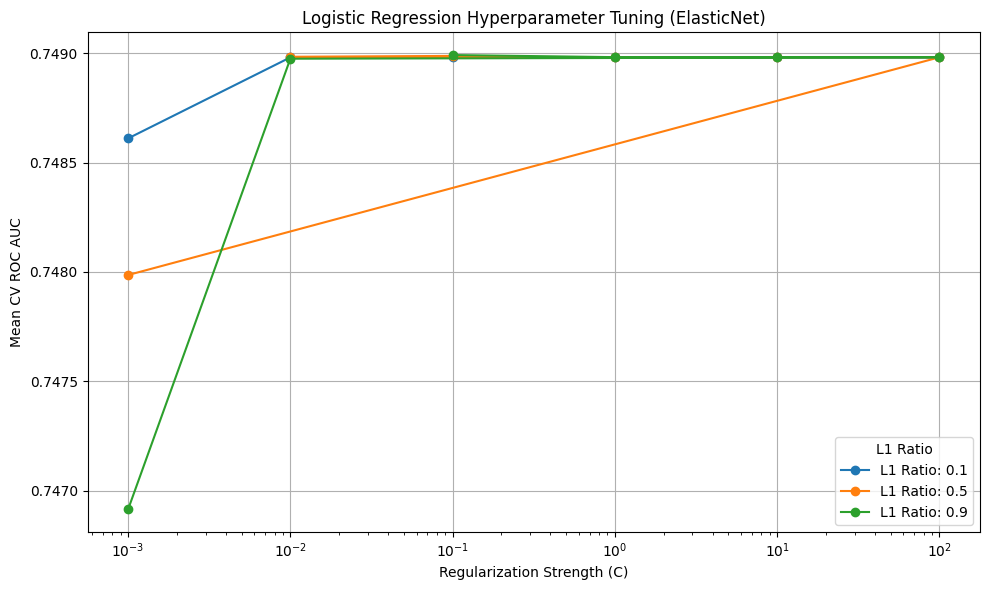

In [ ]:
# Plot how ROC AUC varies across different C and l1_ratio values
cv_results['C'] = cv_results['param_classifier__C']
cv_results['l1_ratio'] = cv_results['param_classifier__l1_ratio']


plt.figure(figsize=(10, 6))
for l1_ratio in param_grid['classifier__l1_ratio']:
    subset = cv_results[cv_results['l1_ratio'] == l1_ratio]
    plt.semilogx(subset['C'], subset['mean_test_score'], marker='o', label=f"L1 Ratio: {l1_ratio}")


plt.title("Logistic Regression Hyperparameter Tuning (ElasticNet)")
plt.xlabel("Regularization Strength (C)")
plt.ylabel("Mean CV ROC AUC")
plt.grid(True)
plt.legend(title="L1 Ratio")
plt.tight_layout()
plt.show()



In [ ]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, classification_report, confusion_matrix
)



# generate predictions and probabilities
y_pred_log = best_log_reg_model.predict(X_test)
y_proba_log = best_log_reg_model.predict_proba(X_test)[:, 1]



# define a function to calculate metrics
def evaluate_model(y_true, y_pred, y_proba):
    return {
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred),
        'Recall': recall_score(y_true, y_pred),
        'F1 Score': f1_score(y_true, y_pred),
        'ROC AUC': roc_auc_score(y_true, y_proba)
    }



# evaluate the model
metrics_log = evaluate_model(y_test, y_pred_log, y_proba_log)



# display results
print("\n=== Logistic Regression Test Set Metrics ===")
for k, v in metrics_log.items():
    print(f"{k}: {v:.4f}")



# classification Report
print("\n=== Classification Report: Logistic Regression ===")
print(classification_report(y_test, y_pred_log))


=== Logistic Regression Test Set Metrics ===
Accuracy: 0.6853
Precision: 0.2244
Recall: 0.6959
F1 Score: 0.3393
ROC AUC: 0.7552

=== Classification Report: Logistic Regression ===
              precision    recall  f1-score   support

           0       0.94      0.68      0.79     67709
           1       0.22      0.70      0.34      8896

    accuracy                           0.69     76605
   macro avg       0.58      0.69      0.57     76605
weighted avg       0.86      0.69      0.74     76605



# Model Implementation - CatBoost Classifier

In [ ]:
!pip install numpy==1.26.0 catboost
!pip install catboost scikit-learn imbalanced-learn
!pip install --upgrade numpy scikit-learn catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.5/58.5 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 81.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 7.2 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.0 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 101.2 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.0
    Uninstalling numpy-1.26.0:
      Successfully uninstalled numpy-1.26.0
ERROR: pip's dependency resolver does 

In [ ]:
# check the versions fro errors

import numpy as np
import catboost

print("NumPy Version:", np.__version__)
print("CatBoost Version:", catboost.__version__)

import sys
print(sys.executable)

!which pip
!pip --version

NumPy Version: 2.0.2
CatBoost Version: 1.2.8
/usr/bin/python3
/usr/local/bin/pip
pip 24.1.2 from /usr/local/lib/python3.11/dist-packages/pip (python 3.11)


In [ ]:
from catboost import CatBoostClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, classification_report, confusion_matrix
)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np



# handle Class Imbalance
# CatBoost can accept class weights directly
majority_weight = 1
minority_weight = len(y_train) / sum(y_train)  # inverse of minority class frequency

class_weights = {0: majority_weight, 1: minority_weight}
print(f"Applied class weights: {class_weights}")



# Create a CatBoost pipeline
# CatBoost handles numerical features natively no need to scale or encode.
catboost_pipeline = Pipeline(steps=[
    ('classifier', CatBoostClassifier(
        verbose=0,
        random_state=42,
        class_weights=class_weights,
        eval_metric='AUC'
    ))
])




# Define Hyperparameter Grid
param_grid_cat = {
    'classifier__iterations': [100, 200],
    'classifier__depth': [4, 6, 8],
    'classifier__learning_rate': [0.01, 0.1],
    'classifier__l2_leaf_reg': [1, 3, 5]
}



# Cross-Validation Setup (Stratified due to class imbalance)
cv_cat = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


# setup GridSearchCV
grid_search_cat = GridSearchCV(
    estimator=catboost_pipeline,
    param_grid=param_grid_cat,
    cv=cv_cat,
    scoring='roc_auc',  # Use ROC AUC due to class imbalance
    verbose=1,
    n_jobs=-1  # Run in parallel
)




Applied class weights: {0: 1, 1: 8.61116731704967}


In [ ]:
# Train the CatBoost Model
print("\nTraining CatBoost model with hyperparameter tuning...")
grid_search_cat.fit(X_train, y_train)


Training CatBoost model with hyperparameter tuning...
Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('classifier',
                                        <catboost.core.CatBoostClassifier object at 0x791123cef1d0>)]),
             n_jobs=-1,
             param_grid={'classifier__depth': [4, 6, 8],
                         'classifier__iterations': [100, 200],
                         'classifier__l2_leaf_reg': [1, 3, 5],
                         'classifier__learning_rate': [0.01, 0.1]},
             scoring='roc_auc', verbose=1)

In [ ]:
# retreive the best model
best_cat_model = grid_search_cat.best_estimator_


# best Hyperparameters
print("\nBest parameters found for CatBoost:")
print(grid_search_cat.best_params_)
print(f"Best cross-validation ROC AUC score: {grid_search_cat.best_score_:.4f}")


Best parameters found for CatBoost:
{'classifier__depth': 4, 'classifier__iterations': 200, 'classifier__l2_leaf_reg': 5, 'classifier__learning_rate': 0.1}
Best cross-validation ROC AUC score: 0.7517


In [ ]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, classification_report, confusion_matrix
)

# predictions and probabilities
y_pred_cat = best_cat_model.predict(X_test)
y_proba_cat = best_cat_model.predict_proba(X_test)[:, 1]



# evaluate model using the same function as above
metrics_cat = evaluate_model(y_test, y_pred_cat, y_proba_cat)



# print results
print("\n=== CatBoost Test Set Metrics ===")
for k, v in metrics_cat.items():
    print(f"{k}: {v:.4f}")



# classification report
print("\n=== Classification Report: CatBoost Classifier ===")
print(classification_report(y_test, y_pred_cat))


=== CatBoost Test Set Metrics ===
Accuracy: 0.6560
Precision: 0.2140
Recall: 0.7343
F1 Score: 0.3315
ROC AUC: 0.7594

=== Classification Report: CatBoost Classifier ===
              precision    recall  f1-score   support

           0       0.95      0.65      0.77     67709
           1       0.21      0.73      0.33      8896

    accuracy                           0.66     76605
   macro avg       0.58      0.69      0.55     76605
weighted avg       0.86      0.66      0.72     76605



# Model Comparison and Discussion

In [ ]:
# Generate predictions and probabilities
# 1) Logistic Regression
y_pred_log = best_log_reg_model.predict(X_test)
y_proba_log = best_log_reg_model.predict_proba(X_test)[:, 1]


# 2) CatBoost
y_pred_cat = best_cat_model.predict(X_test)
y_proba_cat = best_cat_model.predict_proba(X_test)[:, 1]

In [ ]:
# make a helper function to calculatte and return all metrics
def evaluate_model(y_true, y_pred, y_proba):
    return {
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred),
        'Recall': recall_score(y_true, y_pred),
        'F1 Score': f1_score(y_true, y_pred),
        'ROC AUC': roc_auc_score(y_true, y_proba)
    }



# Evaluate both models
metrics_log = evaluate_model(y_test, y_pred_log, y_proba_log)
metrics_cat = evaluate_model(y_test, y_pred_cat, y_proba_cat)



# Create a DataFrame for side-by-side comparison
import pandas as pd
comparison_df = pd.DataFrame([metrics_log, metrics_cat], index=['Logistic Regression', 'CatBoost Classifier'])

# Round for presentation
comparison_df = comparison_df.round(4)

print("\n=== Model Evaluation Comparison ===")
display(comparison_df)


#  Display Classification Reports
print("=== Classification Report: Logistic Regression ===")
print(classification_report(y_test, y_pred_log))

print("\n=== Classification Report: CatBoost Classifier ===")
print(classification_report(y_test, y_pred_cat))



=== Model Evaluation Comparison ===


,Accuracy,Precision,Recall,F1 Score,ROC AUC
Logistic Regression,0.6853,0.2244,0.6959,0.3393,0.7552
CatBoost Classifier,0.6560,0.2140,0.7343,0.3315,0.7594


=== Classification Report: Logistic Regression ===
              precision    recall  f1-score   support

           0       0.94      0.68      0.79     67709
           1       0.22      0.70      0.34      8896

    accuracy                           0.69     76605
   macro avg       0.58      0.69      0.57     76605
weighted avg       0.86      0.69      0.74     76605


=== Classification Report: CatBoost Classifier ===
              precision    recall  f1-score   support

           0       0.95      0.65      0.77     67709
           1       0.21      0.73      0.33      8896

    accuracy                           0.66     76605
   macro avg       0.58      0.69      0.55     76605
weighted avg       0.86      0.66      0.72     76605



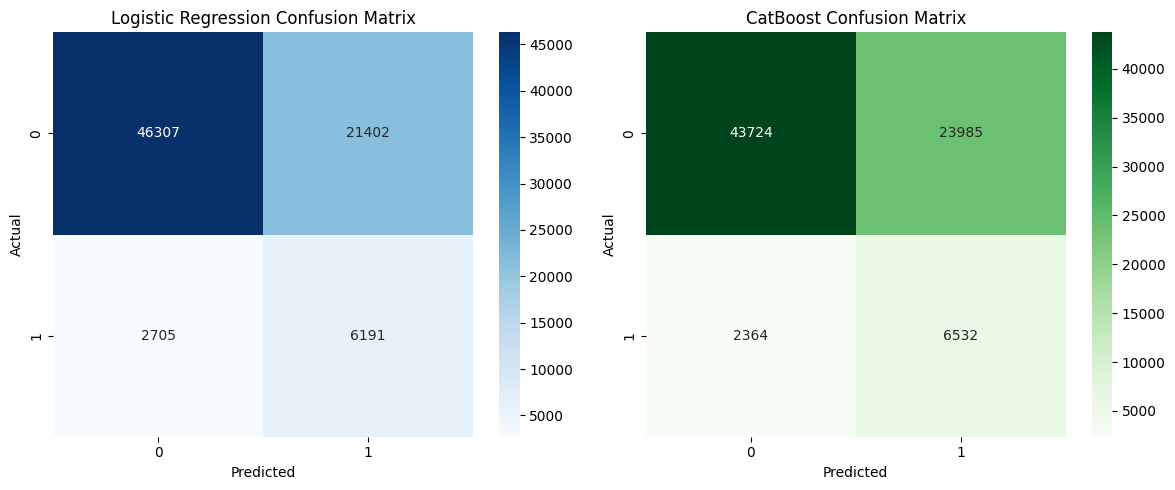

In [ ]:
# Confusion matrices
cm_log = confusion_matrix(y_test, y_pred_log)
cm_cat = confusion_matrix(y_test, y_pred_cat)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(cm_log, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title("Logistic Regression Confusion Matrix")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

sns.heatmap(cm_cat, annot=True, fmt='d', cmap='Greens', ax=axes[1])
axes[1].set_title("CatBoost Confusion Matrix")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

plt.tight_layout()
plt.show()

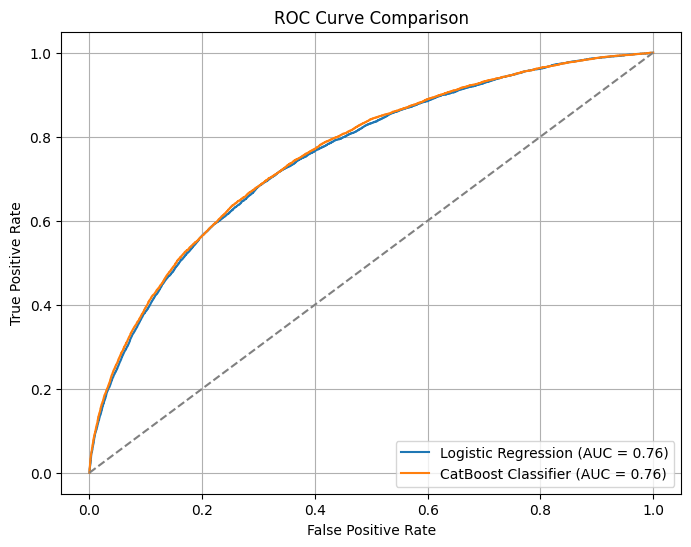

In [ ]:
# Plot ROC Curves
fpr_log, tpr_log, _ = roc_curve(y_test, y_proba_log)
fpr_cat, tpr_cat, _ = roc_curve(y_test, y_proba_cat)

plt.figure(figsize=(8, 6))
plt.plot(fpr_log, tpr_log, label=f'Logistic Regression (AUC = {roc_auc_score(y_test, y_proba_log):.2f})')
plt.plot(fpr_cat, tpr_cat, label=f'CatBoost Classifier (AUC = {roc_auc_score(y_test, y_proba_cat):.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [ ]:
# Create a DataFrame for side-by-side comparison
import pandas as pd

comparison_df = pd.DataFrame([metrics_log, metrics_cat],
                             index=['Logistic Regression', 'CatBoost Classifier']).round(4)

print("=== Side-by-Side Model Evaluation ===")
display(comparison_df)



=== Side-by-Side Model Evaluation ===


,Accuracy,Precision,Recall,F1 Score,ROC AUC
Logistic Regression,0.6853,0.2244,0.6959,0.3393,0.7552
CatBoost Classifier,0.6560,0.2140,0.7343,0.3315,0.7594


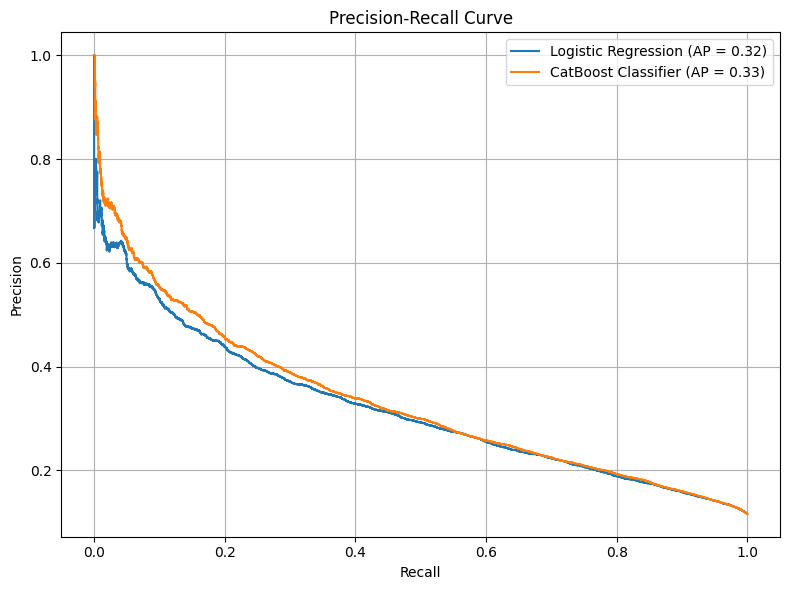

In [ ]:
from sklearn.metrics import precision_recall_curve, average_precision_score

# Logistic Regression
precision_log, recall_log, _ = precision_recall_curve(y_test, y_proba_log)
ap_log = average_precision_score(y_test, y_proba_log)

# CatBoost
precision_cat, recall_cat, _ = precision_recall_curve(y_test, y_proba_cat)
ap_cat = average_precision_score(y_test, y_proba_cat)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(recall_log, precision_log, label=f'Logistic Regression (AP = {ap_log:.2f})')
plt.plot(recall_cat, precision_cat, label=f'CatBoost Classifier (AP = {ap_cat:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()